In [1]:
import pandas as pd
import gensim
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
from pprint import pprint

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

In [2]:
data = pd.read_csv('scrape/restaurant-data/cleaned_restaurant_reviews.csv', index_col=0)

## LDA

In [3]:
data = data.reset_index(drop=True)

In [5]:
# create dictionary
docs = data['cleaned_text']
processed_docs = [d.split() for d in docs]
dictionary = gensim.corpora.Dictionary(processed_docs)

In [6]:
# term document frequency
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [7]:
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       id2word=dictionary,
                                       num_topics=10,
                                       random_state =100)

In [8]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0,
  '0.011*"dish" + 0.009*"good" + 0.008*"taste" + 0.007*"food" + 0.006*"like" + '
  '0.005*"try" + 0.005*"come" + 0.004*"fresh" + 0.004*"cream" + 0.004*"sweet"'),
 (1,
  '0.008*"taste" + 0.008*"sauce" + 0.007*"beef" + 0.007*"good" + '
  '0.006*"chicken" + 0.006*"great" + 0.006*"try" + 0.005*"meat" + '
  '0.005*"cream" + 0.005*"food"'),
 (2,
  '0.010*"flavour" + 0.008*"egg" + 0.008*"cheese" + 0.007*"good" + '
  '0.006*"sweet" + 0.006*"tea" + 0.005*"pretty" + 0.005*"try" + 0.005*"like" + '
  '0.004*"time"'),
 (3,
  '0.010*"sauce" + 0.007*"flavour" + 0.007*"taste" + 0.007*"sweet" + '
  '0.006*"chicken" + 0.005*"rice" + 0.005*"cream" + 0.005*"dish" + '
  '0.004*"good" + 0.004*"cake"'),
 (4,
  '0.015*"good" + 0.012*"pork" + 0.006*"flavour" + 0.006*"sauce" + '
  '0.005*"taste" + 0.005*"like" + 0.004*"fry" + 0.004*"pasta" + 0.004*"menu" + '
  '0.004*"cake"'),
 (5,
  '0.012*"chicken" + 0.010*"rice" + 0.010*"fry" + 0.008*"like" + 0.007*"good" '
  '+ 0.007*"taste" + 0.007*"pork" + 0.006*"sau

In [9]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
lda_score = coherence_model_lda.get_coherence()
lda_score

0.31927460734694196

In [10]:
def compute_coherence_values(k):
    
    lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state =100)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [11]:
# iterate through number of topics
coherence_values = []
topics_range = range(2,11,1)
for k in topics_range:
    value = compute_coherence_values(k)
    print(k)
    print(value)
    coherence_values.append(value)

2
0.3105505421970811
3
0.3378669859668582
4
0.3408749728928985
5
0.32863493580335285
6
0.3204953274414298
7
0.318014961476546
8
0.3214241208693184
9
0.3194373599853681
10
0.31927460734694196


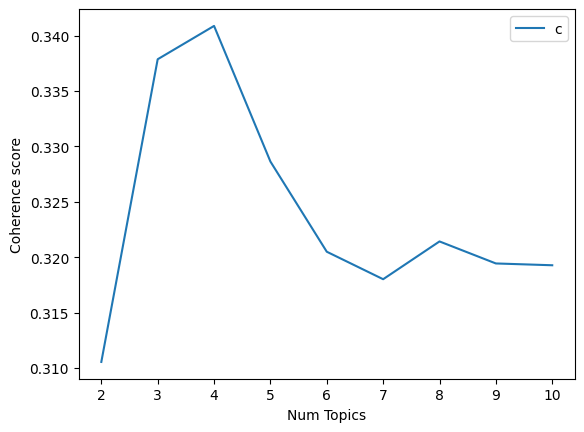

In [12]:
# Show graph
plt.plot(topics_range, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [14]:
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state = 100)
# Print the Keyword in the 3 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0,
  '0.009*"good" + 0.009*"dish" + 0.007*"like" + 0.007*"taste" + 0.006*"food" + '
  '0.005*"try" + 0.005*"egg" + 0.004*"pork" + 0.004*"sweet" + 0.004*"fry"'),
 (1,
  '0.007*"taste" + 0.007*"good" + 0.007*"sauce" + 0.007*"chicken" + '
  '0.006*"pork" + 0.005*"beef" + 0.005*"like" + 0.005*"try" + 0.004*"fry" + '
  '0.004*"serve"'),
 (2,
  '0.009*"flavour" + 0.008*"egg" + 0.007*"good" + 0.006*"cheese" + '
  '0.006*"like" + 0.006*"sweet" + 0.005*"fry" + 0.005*"try" + 0.005*"pork" + '
  '0.004*"taste"'),
 (3,
  '0.008*"sauce" + 0.007*"flavour" + 0.006*"chicken" + 0.006*"sweet" + '
  '0.006*"taste" + 0.006*"rice" + 0.005*"fry" + 0.005*"cake" + 0.005*"good" + '
  '0.004*"dish"')]


In [15]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/natalie/opt/anaconda3/envs/bt4221/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.012542 -0.004541       1        1  32.685474
3     -0.024142 -0.000684       2        1  27.185688
1      0.005520 -0.015462       3        1  20.193798
2      0.006081  0.020686       4        1  19.935040, topic_info=        Term         Freq        Total Category  logprob  loglift
98       egg  5584.000000  5584.000000  Default  30.0000  30.0000
362  chicken  5591.000000  5591.000000  Default  29.0000  29.0000
21     sauce  6743.000000  6743.000000  Default  28.0000  28.0000
11   flavour  6973.000000  6973.000000  Default  27.0000  27.0000
865   cheese  4167.000000  4167.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
21     sauce   822.872243  6743.809149   Topic4  -5.7173  -0.4909
226     food   735.419572  5305.932304   Topic4  -5.8296  -0.3634
168     dish   776.853233  6790.609262   Topic4  -5.7748  -0.5554
116     come   649.806062  3818.348083   Topic4  -5.9534  -0.1582
22     serve   640.762832  4430.222879   Topic4  -5.9674  -0.3209

[406 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
25940      1  0.882805  111somersetsg
25940      3  0.147134  111somersetsg
37889      2  0.758479           1931
33833      1  0.101536           2518
33833      2  0.710755           2518
...      ...       ...            ...
11919      2  0.149585            𝗺𝗶𝗻
11919      4  0.747925            𝗺𝗶𝗻
36454      1  0.799570          𝙈𝙖𝙘𝙝𝙞
36454      2  0.114224          𝙈𝙖𝙘𝙝𝙞
36454      4  0.114224          𝙈𝙖𝙘𝙝𝙞

[896 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])